In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [19]:
bank_df = pd.read_csv('../data/bank/bank-full.csv', sep=';')

In [20]:
bank_df = bank_df.drop(['duration', 'poutcome'], axis=1)
print("now column names after dropping duration: ", list(bank_df.columns))


now column names after dropping duration:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'y']


In [21]:
# Find the categorical variables
print("data types of the features: \n", bank_df.dtypes)


data types of the features: 
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object


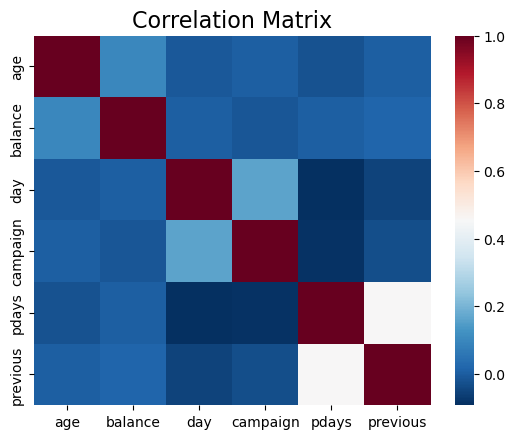

In [22]:
#### Check the Correlation Matrix of the Numerical Variables

numeric_bank_df = bank_df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_bank_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)
plt.show()  # very low correlation among the numeric variables, i.e. they all play important results


In [23]:
#### Finally convert the categorical variabels ('object type') to dummy variables
# Not so sure what exactly the 'poutcome' does.

cat_vars = ['job', 'marital', 'education',
            'default', 'housing', 'loan', 'contact', 'month']


bank_df_dummies = pd.get_dummies(bank_df, columns=cat_vars)

print("check the column names: ", bank_df_dummies.columns.tolist())
print("\n")
print("total number of columns: ", len(bank_df_dummies.columns.tolist()))


check the column names:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


total number of columns:  47


In [24]:
# Since Deposit is the label so we can now prepare the training and test data for further analysis

## Turn yes/no in deposit to 1/0

print(bank_df_dummies['y'].value_counts())


no     39922
yes     5289
Name: y, dtype: int64


In [25]:
bank_df_dummies['y'] = bank_df_dummies['y'].map(
    {'yes': 1, 'no': 0})

print(bank_df_dummies['y'].value_counts())


0    39922
1     5289
Name: y, dtype: int64


In [26]:
labels = bank_df_dummies[['y']]
print("check labels: ", labels.head(3))


check labels:     y
0  0
1  0
2  0


In [27]:
features = bank_df_dummies.drop(['y'], axis=1)


In [28]:
print("features data type: ", features.dtypes)


features data type:  age                    int64
balance                int64
day                    int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown       

In [29]:
col_names_list = list(features.columns.values)
print("features in a list: ", col_names_list)
print("\n")
print("number of features: ", len(col_names_list))


features in a list:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


number of features:  46


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.20, stratify=labels)

print("number of training samples: ", len(X_train))
print("number of test samples: ", len(y_test))


number of training samples:  36168
number of test samples:  9043


In [31]:
pipe_steps = [('scaler', StandardScaler()),
              ('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion': ['gini', 'entropy'],
                'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)


Pipeline(steps=[('scaler', StandardScaler()),
                ('decsT', DecisionTreeClassifier())])


In [32]:
# ### I love you so much

# from tqdm import tqdm_notebook as tqdm

# import warnings
# print("start fitting the data")
# warnings.filterwarnings("ignore")


# for cv in tqdm(range(3, 6)):
#     create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
#     create_grid.fit(X_train, y_train)
#     print("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
#     print("!!!! best fit parameters from GridSearchCV !!!!")
#     print(create_grid.best_params_)

# print("out o' the loop")


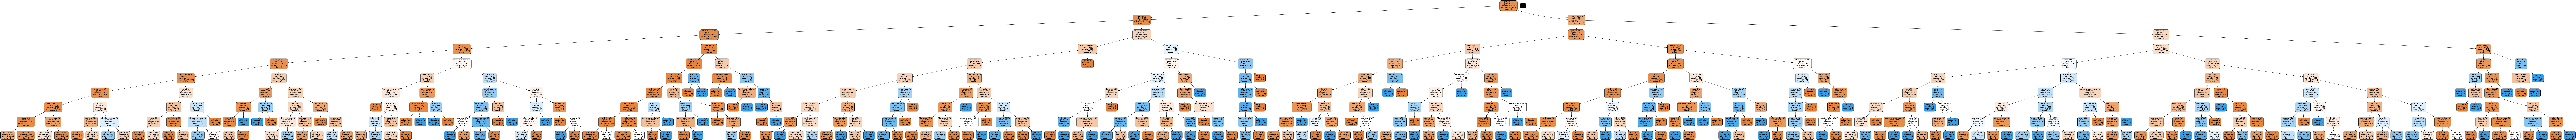

In [33]:

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=9)
DecsTree.fit(X_train, y_train)


dot_data = StringIO()

export_graphviz(DecsTree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=col_names_list, class_names=['0', '1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())


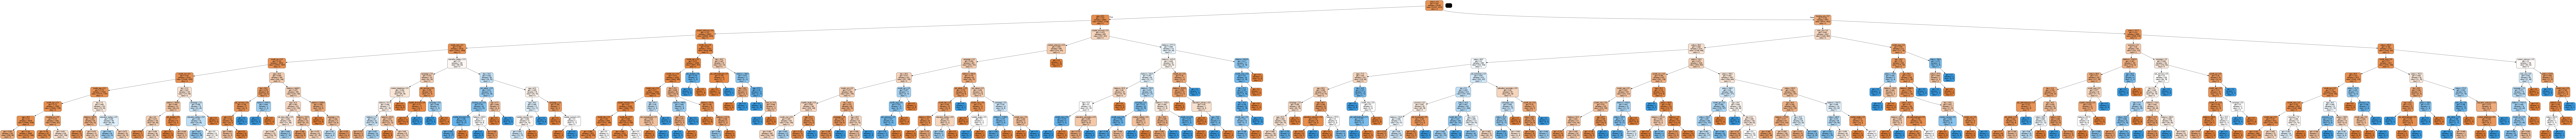

In [34]:
DecsTreeCheck = DecisionTreeClassifier(criterion='gini', max_depth=4)
DecsTree.fit(X_train, y_train)


dot_data = StringIO()

export_graphviz(DecsTree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=col_names_list, class_names=['0', '1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT_check.png',)
Image(graph.create_png())
